In [103]:
import numpy as np
from libtiff import TIFF
import itk
import itkwidgets
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import optimize

In [2]:
# This is unnecessary now IFF you have the npy file.
x,y,z = 1085, 1085, 1789
img = np.zeros([x,y,z], dtype=np.float32)
for i in range(z):
    tif = TIFF.open(r"./2024_REU_PNNL/3DprintA_downx2_" + str(i) + ".tif", mode='r')
    img[:,:,i] = tif.read_image()
    
# Save the stack to a .npy stack!
# np.save("./2024_FULL-STACK.npy", img)

In [2]:
img = np.load('2024_FULL-STACK.npy')

In [10]:
img1 = img - 9600
img1[img1<0] = 0
img1 = img1 / np.max(img1)
img1 = img1 * 255
img1 = np.array(img1, dtype=np.uint8)

In [142]:
np.save("NORMALIZED-RP-STACK.npy", img1)

In [56]:
print(np.max(img1))
print(np.min(img1))

255
0


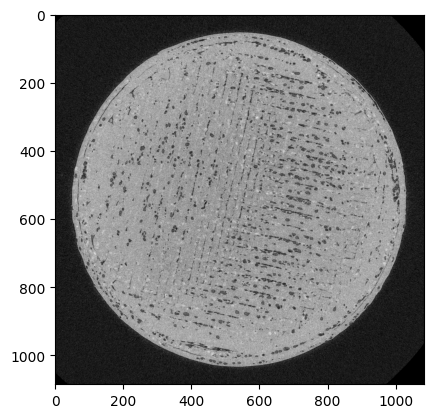

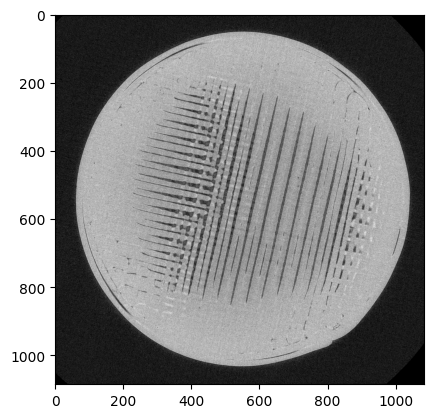

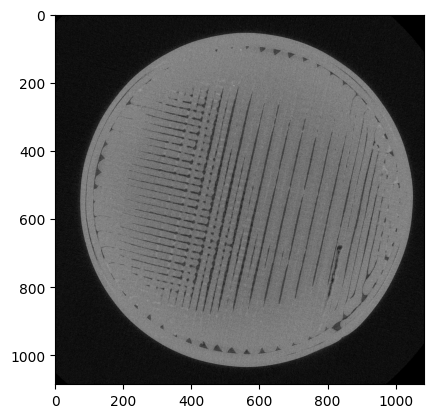

In [12]:
# Create slices of the object within each material region.
# This is used for analyzing the diameter, as it may be different between materials.

plt.imshow(img1[:,:,200], cmap='gray')
plt.show()

plt.imshow(img1[:,:,900], cmap='gray')
plt.show()

plt.imshow(img1[:,:,1600], cmap='gray')
plt.show()

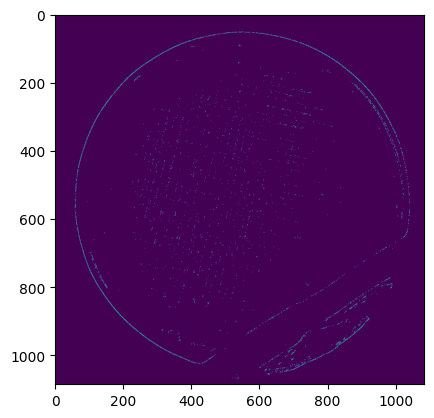

In [129]:
testing = img1[:,:,700]
# ret, mat = cv.threshold(testing, 4, 255, cv.THRESH_BINARY)
mat = cv.Canny(testing, 45, 45)

plt.imshow(mat)
plt.show()

In [130]:
def cost(params):
    x,y,r = np.int64(params)
    mask = np.zeros([1085, 1085], dtype=np.uint8)
    mask = cv.circle(mask, [x,y], r, [1,1,1])
    return np.sum(mat+mask)

x0,y0,r0 = optimize.fmin(cost, (543, 543, 493))

print(x0)
print(y0)
print(r0)

print(np.int32(x0))

Optimization terminated successfully.
         Current function value: 1045352.000000
         Iterations: 33
         Function evaluations: 114
550.4329933449071
546.0697667502573
492.48976042738315
550


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


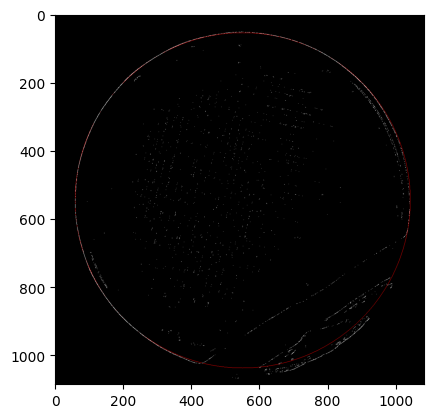

In [131]:
mask = np.zeros([1085,1085,3], dtype=np.uint8)
mask = cv.circle(mask, [np.uint32(x0), np.uint32(y0)], np.uint32(r0), [1,0,0])

plh = np.zeros([1085,1085,3])
plh[:,:,0] = mat
plh[:,:,1] = mat
plh[:,:,2] = mat

plt.imshow(plh+mask)
plt.show()

In [134]:
radii = []
for i in range(1789):
    testing = img1[:,:,i]
    mat = cv.Canny(testing, 45, 45)

    def cost(params):
        x,y,r = np.int64(params)
        if r < 1:
            return 1e13 
        mask = np.zeros([1085, 1085], dtype=np.uint8)
        mask = cv.circle(mask, [x,y], r, [1,1,1])
        return np.sum(mat+mask)
    
    x0,y0,r0 = optimize.fmin(cost, (543, 543, 493))
    radii.append(np.int64(r0))

Optimization terminated successfully.
         Current function value: 4.000000
         Iterations: 50
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 8419.000000
         Iterations: 50
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 17271.000000
         Iterations: 32
         Function evaluations: 115
Optimization terminated successfully.
         Current function value: 22369.000000
         Iterations: 30
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 26201.000000
         Iterations: 31
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 43864.000000
         Iterations: 50
         Function evaluations: 147
Optimization terminated successfully.
         Current function value: 34684.000000
         Iterations: 50
         Function evaluations: 147
Opti

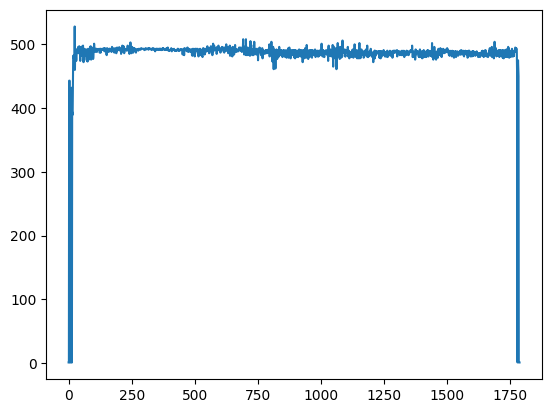

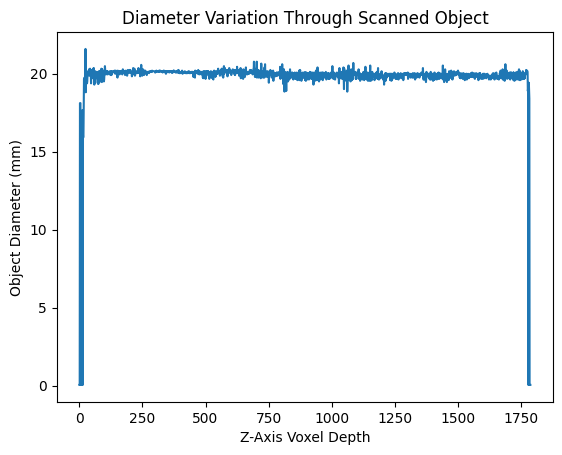

In [141]:
plt.plot(range(1789), radii)
plt.show()

dias = 2.*np.asarray(radii)*20.4382 / 1000
plt.plot(range(1789), dias)
plt.ylabel("Object Diameter (mm)")
plt.xlabel("Z-Axis Voxel Depth")
plt.title("Diameter Variation Through Scanned Object")
plt.show()

In [4]:
# Run this cell if you want to use 3D visualization! This is required for operating with the ITK package.
volume = itk.GetImageFromArray(img)

In [5]:
# Display the stack in 3D. It will be rotated by 90 degrees, oops.
# You can modify this method call to automatically set the min and max to values that look clean.
# I suggest 10000 and 13000 for this object.
itkwidgets.view(volume)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…